In [31]:
imgs_path = 'data/raw/multi/images/test'
ann_path = 'data/raw/multi/annotation/test/coco_annotation.json'
labels = ['gun', 'knife']
n_classes = len(labels)
batch_size = 4

# Navigate root project
%cd /home/ronald/PycharmProjects/x-ray-deep-learning/X-ray_Object_Detection/

/home/ronald/PycharmProjects/x-ray-deep-learning/X-ray_Object_Detection


Max Count Area 8095.5
Dice Result: tf.Tensor(1.0, shape=(), dtype=float32)


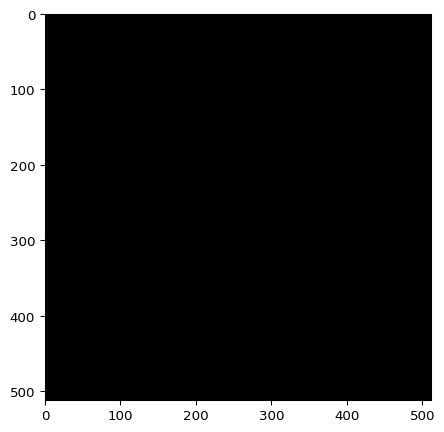

Max Count Area 17472.0
Dice Result: tf.Tensor(0.66119546, shape=(), dtype=float32)


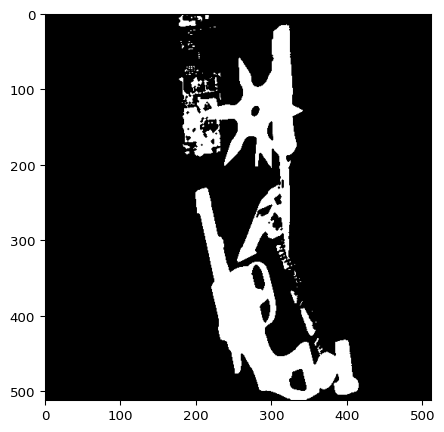

Max Count Area 21325.0
Dice Result: tf.Tensor(0.64945936, shape=(), dtype=float32)


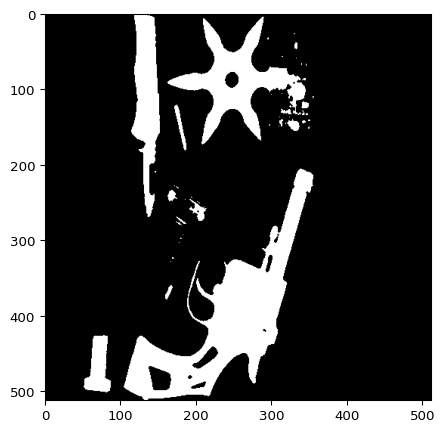

Max Count Area 10440.0
Dice Result: tf.Tensor(0.11380055, shape=(), dtype=float32)


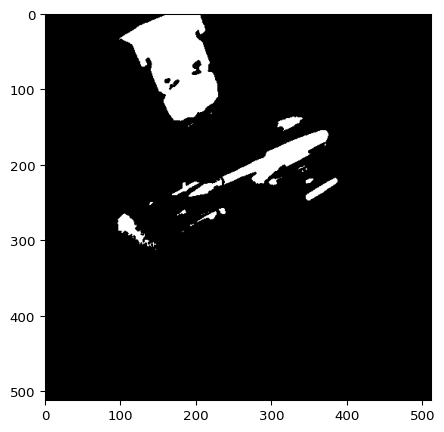

Max Count Area 23162.0
Dice Result: tf.Tensor(0.65024763, shape=(), dtype=float32)


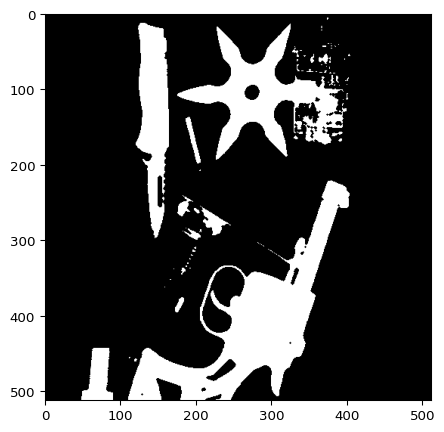

Max Count Area 17669.5
Dice Result: tf.Tensor(0.66312754, shape=(), dtype=float32)


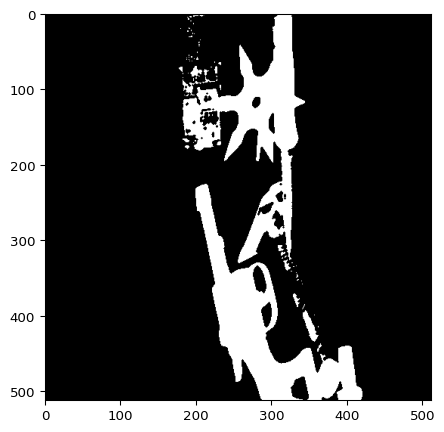

Max Count Area 5896.0
Dice Result: tf.Tensor(0.18893786, shape=(), dtype=float32)


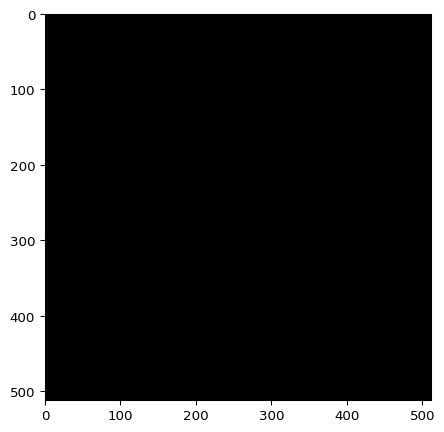

Max Count Area 14823.5
Dice Result: tf.Tensor(0.6091443, shape=(), dtype=float32)


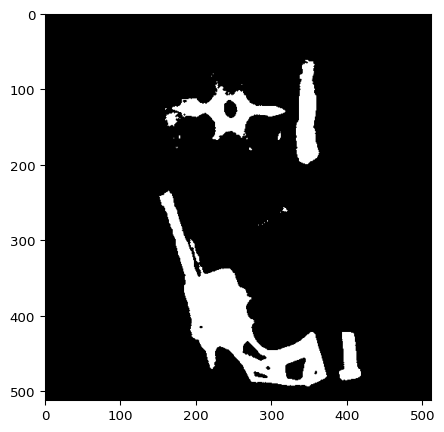

Max Count Area 8913.5
Dice Result: tf.Tensor(0.18189132, shape=(), dtype=float32)


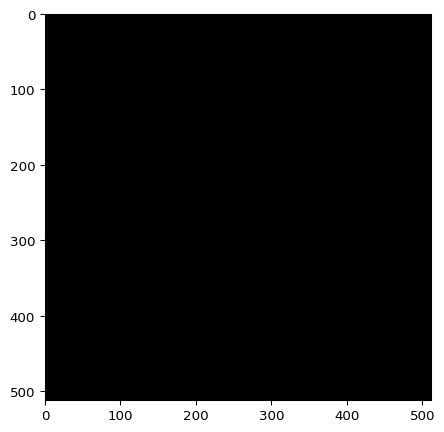

Max Count Area 16916.0
Dice Result: tf.Tensor(0.64622754, shape=(), dtype=float32)


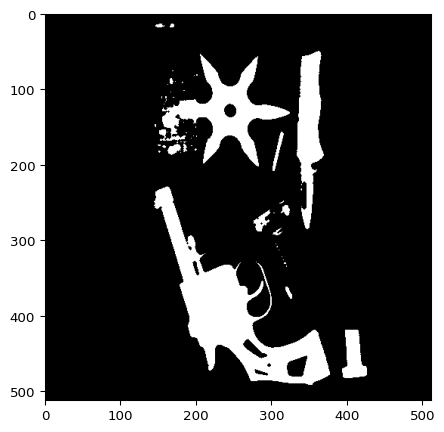

Max Count Area 17297.5
Dice Result: tf.Tensor(0.63565683, shape=(), dtype=float32)


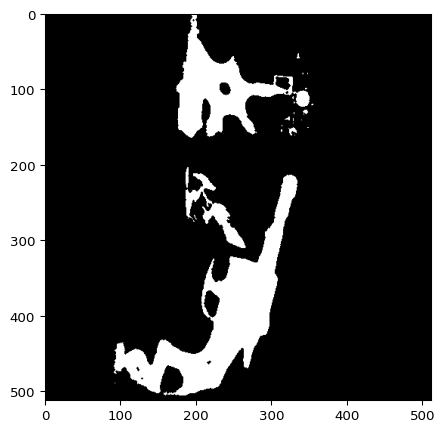

Max Count Area 7253.0
Dice Result: tf.Tensor(1.0, shape=(), dtype=float32)


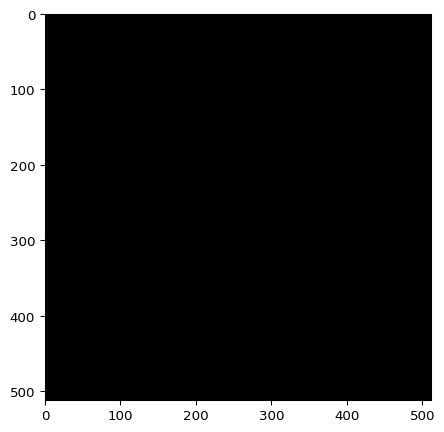

Dice Results: 0.5833073


In [109]:
import cv2
import numpy as np
import imgaug as ia
from src.data.GDXrayDataGenerator import GDXrayDataGenerator
from src.utils import create_dir, create_random_list_of_size
from pathlib import Path
from src.models.metrics import dice_coef


def load_data(imgs_path, ann_path):
    # Load images
    input_img_dir = Path(imgs_path)
    imgs_path_list = sorted([i.absolute() for i in input_img_dir.glob("*.png") if i.is_file()])
    
    # Load paths
    ann_path_dir = Path(ann_path)
    
    # Create N numbers of list_images for data augmentation
    imgs_path_list = create_random_list_of_size(imgs_path_list, len(imgs_path_list) * 3)
    
    data_generator = GDXrayDataGenerator(imgs_path_list, ann_path_dir, labels, n_classes, dim=(512, 512, 1),
                                         batch_size=4, task='binary')
    return data_generator

def iter_data_generator(data_generator):
    metrics = []
    for X, y_exp in data_generator.get_iter():
        batch_shape = X.shape[0]
        for i in range(batch_shape):
            thresh = threshold(np.stack((X[i].squeeze(),)*3, axis=-1).astype(np.uint8))
            y_pred = morphology_operation(thresh)
            y_pred = np.expand_dims(y_pred, axis=2)
            dice_result = dice_coef(y_exp[i], y_pred)
            print('Dice Result:',dice_result)
            metrics.append(dice_result)
            color_binary_mask(y_pred)
            #ia.imshow(np.hstack([y_exp[i].squeeze() * 255, y_pred.squeeze()]))
    print('Dice Results:', np.mean(metrics))        

    
def color_binary_mask(pred):
    blank = np.zeros(shape=(512, 512, 3), dtype=np.uint8)
    hue = np.full(shape=(512, 512), fill_value=50, dtype=np.uint8)
    sat = np.full(shape=(512, 512), fill_value=255, dtype=np.uint8)
    val = pred[:,:,0].astype(np.uint8)
    ia.imshow(val)
    im_hsv = cv2.merge([hue, sat, val])
    im_rgb = cv2.cvtColor(im_hsv, cv2.COLOR_HSV2RGB)
    blank = cv2.add(blank, im_rgb)
    
    
    return blank

def threshold(img):
    grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Blur Image
    blur = cv2.medianBlur(grey, 5)
    # Threshold - Get binary image
    thresh_hold = 37
    thresh = cv2.threshold(blur, thresh_hold, 255, cv2.THRESH_BINARY_INV)[1]
    # Find Contours
    cnts = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1] # retrieve counts by version
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
    max_cnt_area = 0
    if len(cnts) > 0:
        max_cnt_area = cv2.contourArea(cnts[0])
    print('Max Count Area',max_cnt_area)   
    if max_cnt_area > 10000:
         _, thresh = cv2.threshold(grey, 37, 255, cv2.THRESH_BINARY_INV)
    else:
        thresh = np.ones(shape=(512, 512), dtype=np.uint8) * 255
    return thresh

def morphology_operation(thresh):
    mask = cv2.dilate(thresh, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3)))
    mask = cv2.erode(mask, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3)))
    return mask
    


iter_data_generator(load_data(imgs_path, ann_path))

(256, 256, 1)


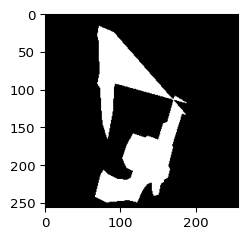

In [7]:
imgaug_shape = [[90.98898315429688, 25.983002], [71.67889404296875, 17.960539], [69.66741943359375, 29.69489], 
                [71.67889404296875, 37.717354], [71.27659606933594, 55.438614], [72.68461608886719, 72.80067], 
                [72.986328125, 78.787575], [69.66741943359375, 93.75485], [73.38864135742188, 99.38255], 
                [74.39437866210938, 123.09073], [76.1041259765625, 146.91866], [82.54081726074219, 165.8373], 
                [89.98324584960938, 127.161835], [90.58668518066406, 98.9036], [92.59815979003906, 92.07852], 
                [186.03085327148438, 118.3012], [171.14598846435547, 109.91952], [161.89324188232422, 144.64362], 
                [156.0599822998047, 145.36206], [149.01984405517578, 167.99258], [135.0401382446289, 162.60435], 
                [131.41950225830078, 164.16096], [116.13233947753906, 159.85037], [108.18704223632812, 173.02159], 
                [102.35377502441406, 191.34154], [107.48301696777344, 203.07588], [116.73577880859375, 208.82332], 
                [113.41685485839844, 217.08527], [108.18704223632812, 220.55768], [96.72166442871094, 219.71951], 
                [83.8482666015625, 213.01418], [77.10984802246094, 207.98517], [73.28805541992188, 213.85233], 
                [66.04676818847656, 242.11057], [80.73049926757812, 249.89355], [109.29335021972656, 246.42114], 
                [121.56329345703125, 249.05539], [127.39656066894531, 235.88419], [134.13497924804688, 225.94589], 
                [140.87339782714844, 222.71297], [141.37625885009766, 224.03008], [141.778564453125, 233.24992], 
                [143.58887481689453, 240.19475], [149.01984405517578, 239.95528], [152.23818969726562, 224.62877], 
                [156.0599822998047, 222.23402], [157.16629028320312, 218.16292], [161.6920928955078, 217.08527], 
                [164.40757751464844, 206.06935], [162.2955322265625, 201.51929], [168.93338012695312, 176.01505], 
                [167.32421112060547, 174.33871], [180.39875030517578, 132.55005], [185.8297119140625, 133.86717]]


blank = np.zeros(shape=(256, 256), dtype=np.float32)
points = np.array(imgaug_shape, dtype=np.int32)
cv2.fillPoly(blank, [points], 255)
blank = blank / 255.0
blank = np.expand_dims(blank, axis=2)
print(blank.shape)
ia.imshow(blank.squeeze() * 255.)

In [ ]:
from imgaug.augmentables import Keypoint, KeypointsOnImage
from imgaug.augmentables.segmaps import SegmentationMapsOnImage
from imgaug.augmentables.polys import Polygon


def draw_segmask_on_image(img, shapes_dict):
    segmap = np.zeros(shape=img.shape, dtype=np.uint8)
    for shape in shapes_dict:
        kps_xy = np.float32(shape['points'])
        kpsoi = KeypointsOnImage.from_xy_array(kps_xy, shape=img.shape)
        poly = Polygon(kpsoi.keypoints)
        segmap = poly.draw_on_image(segmap, color=(hues_labels[shape['label']], 255, 255), alpha=1.0, 
                           alpha_lines=0.0, alpha_points=0.0)
   
    return cv2.cvtColor(segmap, cv2.COLOR_HSV2RGB)